In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# read file
f = pd.read_csv('data.csv')
# from dataframe to nparray
data = np.array(f)

In [3]:
############################### Function ############################### 
def sigmoid(x):
    # sigmoid: S(t) = 1/(1+exp(-t))
    return 1/(1+math.exp(-x))
def Phi(x):
    M = 3
    s = 0.6
    phi = np.array([0.0,0.0,0.0])
    u = np.array([0.0,0.0,0.0])
    for j in range(3):
        u[j] = (2*j)/M
    phi[0] = sigmoid((x-u[0])/s)
    phi[1] = sigmoid((x-u[1])/s)
    phi[2] = sigmoid((x-u[2])/s)
    return phi
def train(N,data,beta):
    # eye: identity matrix
    S_0_inv = np.eye(3,dtype=float)*0.000001
    S_0 = np.linalg.inv(S_0_inv)
    m_0 = np.array([0.0,0.0,0.0])
    m_0 = m_0.reshape(3,1)
    S_N = np.zeros((3,3))
    m_N = np.array([0.0,0.0,0.0])
    m_N = m_N.reshape(3,1)
    for i in range(N):
        t = data[i][1]
        phi = Phi(data[i][0]).reshape(1,3)
        S_N_inv = np.linalg.inv(S_0) + beta*(np.dot(np.transpose(phi),phi))
        S_N = np.linalg.inv(S_N_inv)
        m_N = np.dot(S_N,(np.dot(np.linalg.inv(S_0),m_0)+beta*t*np.transpose(phi)))
        S_0 = S_N
        m_0 = m_N.reshape(3,1)
    # m_N = w_MAP
    return m_N, S_N
def graph1_1(N):
    beta = 1
    m_N, S_N = train(N,data,beta)
    m_N = m_N.reshape(1,3)[0]
    # plot graph
    x = np.linspace(0,2,100)
    w_list = np.random.multivariate_normal(m_N, S_N, 5) # p(w|t) = N(w|m_N, S_N)
    for idx in range(5):
        w = w_list[idx]
        w = w.reshape(3,1)
        y = [ np.dot(Phi(i),w) for i in x]
        plt.plot(x,y,color='r')
    for i in range(N):
        plt.plot(data[i][0],data[i][1],marker='o',color='b')
    plt.title("M="+str(N))
    plt.show()
def graph1_2(N):
    beta = 1
    m_N, S_N = train(N,data,beta)
    m_N = m_N.reshape(1,3)[0]
    x = np.linspace(0,2,100)
    mean = np.array([ np.dot(Phi(i),m_N) for i in x])
    var = np.array([ 1/beta + np.dot(np.dot(Phi(i),S_N),np.transpose(Phi(i))) for i in x])
    std = np.array([ math.sqrt(v) for v in var ])
    upper_bound = mean + std
    lower_bound = mean - std
    plt.plot(x,mean,color='r')
    for i in range(N):
        plt.plot(data[i][0],data[i][1],marker='o',color='b')
    plt.fill_between(x,lower_bound,upper_bound,facecolor='red', alpha=0.2)
    plt.title("M="+str(N))
    plt.show()
def graph1_3(N):
    beta = 1
    m_N, S_N = train(N,data,beta)
    m_N = m_N.reshape(1,3)[0]
    w_sample = np.random.multivariate_normal(m_N, S_N,500000)
    w_sample = np.array(w_sample)
    x = w_sample[:,0] #w0
    y = w_sample[:,1] #w1
    plt.xlabel("w0")
    plt.ylabel("w1")
    plt.hist2d(x,y,bins=[100,100],range=np.array([(-40,80),(-150,100)]),cmap=plt.cm.jet)
    plt.title("M="+str(N))
    plt.show()

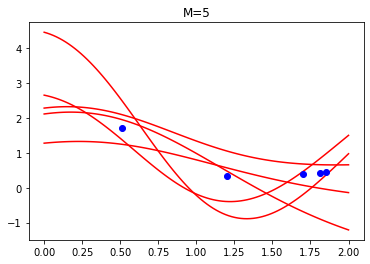

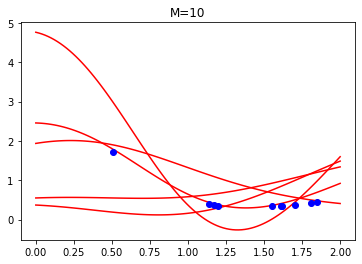

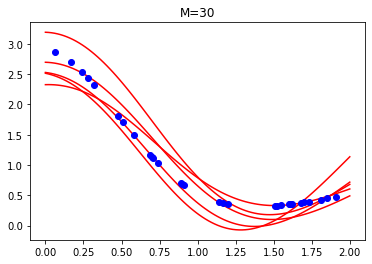

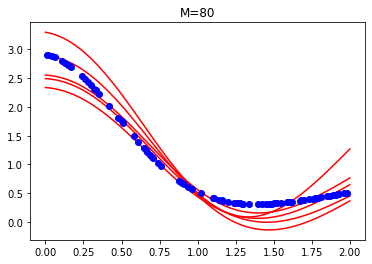

In [4]:
############################### 1.1 ###########################################
# 0 <= x <= 2
# get training result
graph1_1(5)
graph1_1(10)
graph1_1(30)
graph1_1(80)

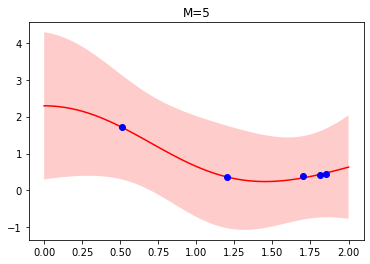

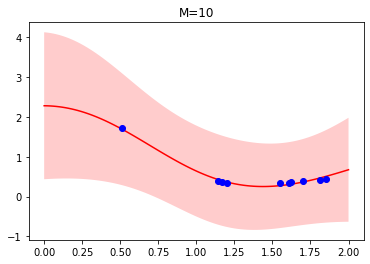

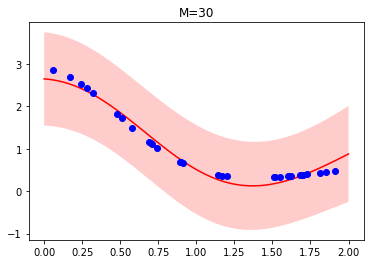

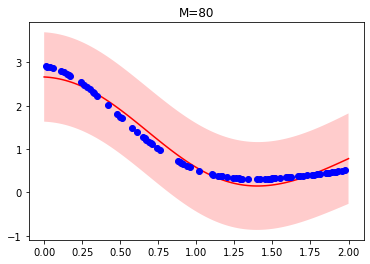

In [6]:
############################### 1.2 ###########################################
# predictive distribution: 
# mean = (m_N)^T*S_N*phi(x)
# variance = 1/beta + phi(x)^T*S_N*phi(x)

graph1_2(5)
graph1_2(10)
graph1_2(30)
graph1_2(80)

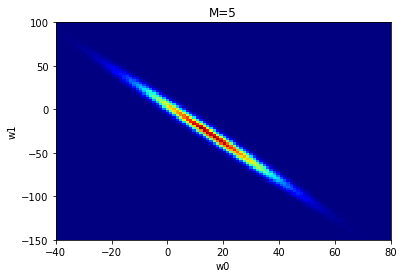

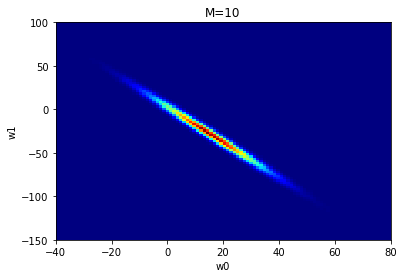

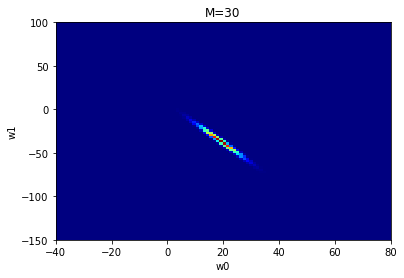

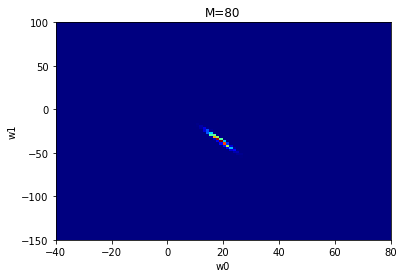

In [7]:
############################### 1.3 ###########################################
graph1_3(5)
graph1_3(10)
graph1_3(30)
graph1_3(80)

# 1-4 Discussion
- While increasing N, we can notice that our model becomes more and more fitting to the true distribution as the result shown in question 1-1, and has smaller variance as the result shown in question 1-2. Also, in question 1-3, it shows that the region of sampling 'w' gets smaller and smaller. In conclusion, all these results indicate Bayesian learning method really learn from the training data sequentially by increasing N. 

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import random
import math
N = 160
# read file
img_list = []
for i in range(5):
    tmp = []
    img_list.append(tmp)
for i in range(5):
    for j in range(64):
        file_name = 'Fashion_MNIST/'+str(i)+'/'+str(j)+'.png'
        img = cv2.imread(file_name,cv2.IMREAD_GRAYSCALE)
        img = np.array(img)
        img = img / 255
        img = img.reshape(1,784)
        img_list[i].append(img)

# shuffle number for randomly select 32 test data from each class
n = [i for i in range(64)]
random.seed(10)
random.shuffle(n)
# make phi & t (test data)
Phi = []
T = []
for i in range(5):
    for j in range(32):
        T.append(i)
        Phi.append(img_list[i][n[j]])
#
Phi = np.array(Phi)
T = np.array(T)
# shuffle data
Phi = Phi.reshape((160,784))
T = T.reshape((160,1))
data = np.insert(Phi,0,values=T.T,axis=1)
np.random.shuffle(data)
Phi = data[:,1:]
label = data[:,0]
Phi = Phi.reshape((160,1,784))
T = []
for i in range(N):
    idx = int(label[i])
    tmp = [0,0,0,0,0]
    tmp[idx] = 1
    T.append(tmp)
# make validation data
vali_Phi = []
vali_T = []
for i in range(5):
    for j in range(32,64):
        tmp = [0,0,0,0,0]
        tmp[i] = 1
        vali_T.append(tmp)
        vali_Phi.append(img_list[i][n[j]])
vali_Phi = np.array(vali_Phi)
vali_T = np.array(vali_T)

In [9]:
def get_y(k,phi,w):
    y_numerator = math.exp(np.dot(w[k],phi.T))
    y_denominator = 0.0
    for j in range(5):
        y_denominator += math.exp(np.dot(w[j],phi.T))
    y = y_numerator/y_denominator
    return y
def get_error(w,T,Phi,N):
    err = 0
    for n in range(N):
        for k in range(5):
            phi = Phi[n]
            y_nk = get_y(k,phi,w)
            err = err + T[n][k]*math.log(y_nk)
    err = -err
    return err

In [13]:
# plot figure & show result
def graph2(iter_num,train_acc_list,test_acc_list,train_err_list,test_err_list,name):
    x = [i for i in range(iter_num)]
    plt.plot(x,train_acc_list,color='b',label="train")
    plt.plot(x,test_acc_list,color='orange',label="test")
    if(iter_num > 10):
        plt.xticks(range(0,iter_num+1,iter_num//10))
    else:
        plt.xticks(range(iter_num+1))
    t = "Accuracy:"+name
    plt.title(t)
    plt.legend()
    plt.show()
    plt.plot(x,train_err_list,color='b',label="train")
    plt.plot(x,test_err_list,color='orange',label="test")
    if(iter_num > 10):
        plt.xticks(range(0,iter_num+1,iter_num//10))
    else:
        plt.xticks(range(iter_num+1))
    t = "Learning curve:"+name
    plt.title(t)
    plt.legend()
    plt.show()
    print("TYPE:",name)
    print("%-20s" % "Training accuracy",":",train_acc_list[iter_num-1])
    print("%-20s" % "Test accuracy",":",test_acc_list[iter_num-1])

In [14]:
# logistic_regression function with different method
def logistic_regression(mode, a, iter_num):
    w = np.zeros((5,784))
    B = 32
    N = 160 # total test case number
    #
    train_err_list = []
    test_err_list = []
    train_acc_list = []
    test_acc_list = []
    for i in range(iter_num):
        # get error
        error = get_error(w,T,Phi,N)
        train_err_list.append(error)
        #print("trian Error =",error)
        error = get_error(w,vali_T,vali_Phi,N)
        test_err_list.append(error)
        #print("test Error =",error)
        # validation
        cnt = 0
        for n in range(N):
            p = [0.0,0.0,0.0,0.0,0.0]
            for k in range(5):
                p[k] = get_y(k,Phi[n],w)
            max_idx = p.index(max(p))
            if(T[n][max_idx] == 1):
                cnt += 1
        #print("training accuracy =", cnt/N)
        train_acc_list.append(cnt/(N))
        cnt = 0
        for n in range(N):
            p = [0.0,0.0,0.0,0.0,0.0]
            for k in range(5):
                p[k] = get_y(k,vali_Phi[n],w)
            max_idx = p.index(max(p))
            if(vali_T[n][max_idx] == 1):
                cnt += 1
        test_acc_list.append(cnt/(N))
        #print("testing accuracy =", cnt/N)
        # Newton
        if(mode == 0):
            for j in range(5):
                for k in range(5):
                    # calculate delta_E(w)
                    delta_Ej = np.zeros(784)
                    for n in range(N):
                        y = get_y(j,Phi[n],w)
                        t = T[n][j]
                        delta_Ej = delta_Ej + (y-t)*Phi[n]
                    # calculate H
                    H = np.zeros((784,784))
                    for n in range(N):
                        y_k = get_y(k,Phi[n],w) #ynk
                        y_j = get_y(j,Phi[n],w) #ynj
                        if(k == j):
                            H += y_k*(1-y_j)*np.dot(Phi[n].T,Phi[n])
                    H_inv = np.linalg.pinv(H)
                    tmp = np.dot(delta_Ej,H_inv).reshape(784)
                    w[j] = w[j] - tmp
        # GD
        elif(mode == 1):
            for j in range(5):
                # calculate delta_E(w)
                delta_Ej = np.zeros(784)
                for n in range(N):
                    y = get_y(j,Phi[n],w)
                    t = T[n][j]
                    delta_Ej = delta_Ej + (y-t)*Phi[n]
                w[j] = w[j] - a*delta_Ej
        # SGD
        elif(mode == 2):
            for n in range(N):
                for j in range(5):
                    # calculate delta_E(w)
                    delta_Ej = np.zeros(784)
                    y = get_y(j,Phi[n],w)
                    t = T[n][j]
                    delta_Ej =(y-t)*Phi[n]
                    w[j] = w[j] - a*delta_Ej
        # mini-batch SGD
        elif(mode == 3):
            for cnt in range(B,N,20):
                for j in range(5):
                    # calculate delta_E(w)
                    delta_Ej = np.zeros(784)
                    for b in range(cnt-B,cnt):
                        y = get_y(j,Phi[b],w)
                        t = T[b][j]
                        delta_Ej = delta_Ej + (y-t)*Phi[b]
                    w[j] = w[j] - a*delta_Ej
    return train_err_list, test_err_list, train_acc_list, test_acc_list

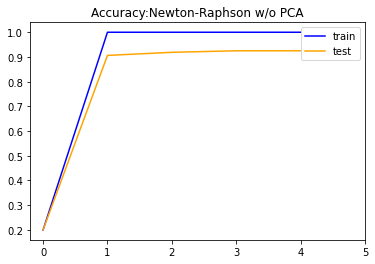

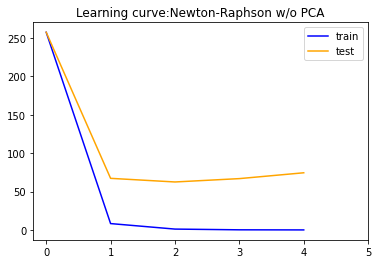

TYPE: Newton-Raphson w/o PCA
Training accuracy    : 1.0
Test accuracy        : 0.925


In [15]:
# Newton
train_err_list,test_err_list,train_acc_list,test_acc_list = logistic_regression(0,0,5)
graph2(5,train_acc_list,test_acc_list,train_err_list,test_err_list, "Newton-Raphson w/o PCA")

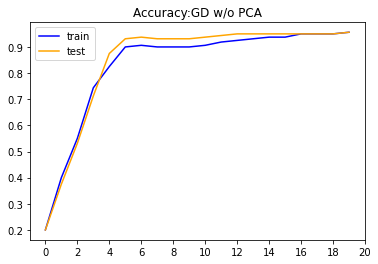

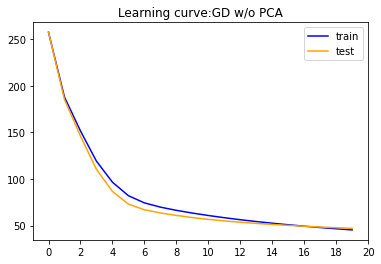

TYPE: GD w/o PCA
Training accuracy    : 0.95625
Test accuracy        : 0.95625


In [16]:
# GD
train_err_list,test_err_list,train_acc_list,test_acc_list = logistic_regression(1,0.001,20)
graph2(20,train_acc_list,test_acc_list,train_err_list,test_err_list, "GD w/o PCA")

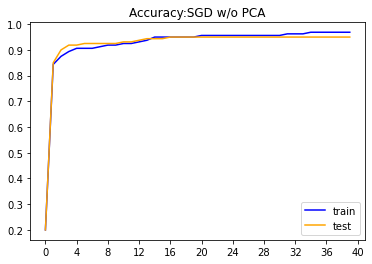

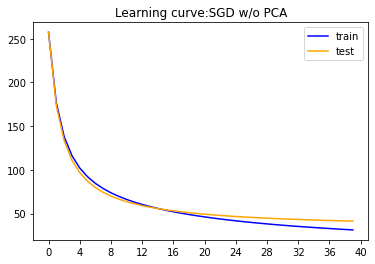

TYPE: SGD w/o PCA
Training accuracy    : 0.96875
Test accuracy        : 0.95


In [17]:
# SGD
train_err_list,test_err_list,train_acc_list,test_acc_list = logistic_regression(2,0.001,40)
graph2(40,train_acc_list,test_acc_list,train_err_list,test_err_list, "SGD w/o PCA")

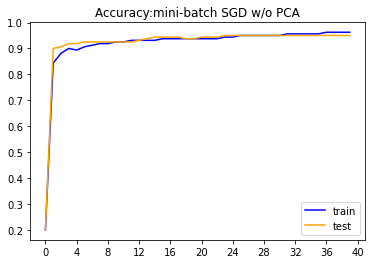

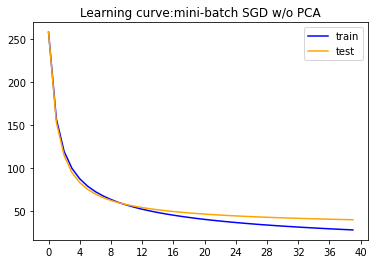

TYPE: mini-batch SGD w/o PCA
Training accuracy    : 0.9625
Test accuracy        : 0.95


In [18]:
# mini-batch SGD
train_err_list,test_err_list,train_acc_list,test_acc_list = logistic_regression(3,0.001,40)
graph2(40,train_acc_list,test_acc_list,train_err_list,test_err_list, "mini-batch SGD w/o PCA")

In [19]:
# PCA
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import random
import math
N = 160
# read file
img_list = []
for i in range(5):
    tmp = []
    img_list.append(tmp)
for i in range(5):
    for j in range(64):
        file_name = 'Fashion_MNIST/'+str(i)+'/'+str(j)+'.png'
        img = cv2.imread(file_name,cv2.IMREAD_GRAYSCALE)
        img = np.array(img)
        img = img / 255
        img = img.reshape(1,784)
        img_list[i].append(img)
# shuffle number for randomly select 32 test data from each class
n = [i for i in range(64)]
random.seed(10)
random.shuffle(n)
# make phi & t (test data)
Phi = []
T = []
for i in range(5):
    for j in range(32):
        tmp = [0,0,0,0,0]
        tmp[i] = 1
        T.append(tmp)
        Phi.append(img_list[i][n[j]])
Phi = np.array(Phi)
T = np.array(T)
# make validation data
vali_Phi = []
vali_T = []
for i in range(5):
    for j in range(32,64):
        tmp = [0,0,0,0,0]
        tmp[i] = 1
        vali_T.append(tmp)
        vali_Phi.append(img_list[i][n[j]])
vali_Phi = np.array(vali_Phi)
vali_T = np.array(vali_T)



In [20]:
def get_top_d_eigvec(data,d):
    # First do Z-score standardization
    Phi_ = data.reshape((160,784))
    Mean = np.mean(Phi_,axis=0)
    Phi_ = Phi_ - Mean
    # make covariance matrix
    cov_matrix = np.cov(Phi_.T)
    # do eig
    U,sigma,VT = np.linalg.svd(cov_matrix)
    ev = VT[0:d]
    ev = ev.real
    return ev
def get_eigvec(data,d):
    # First do Z-score standardization
    Phi_ = data.reshape((160,784))
    Mean = np.mean(Phi_,axis=0)
    Phi_ = Phi_ - Mean
    # make covariance matrix
    print(Phi_.T.shape)
    cov_matrix = np.cov(Phi_.T)
    # do eig
#     U,sigma,VT = np.linalg.svd(cov_matrix)
#     ev = VT[0:d]
#     ev = ev.real
    eig_val, eig_vec = np.linalg.eig(cov_matrix)
    ev = eig_vec[:,0:d]
    return ev.real
def PCA_transformation(data,ev,d):
    # reshpae Phi
    Phi_ = data.reshape((160,784))
    Phi_ = np.dot(Phi_, ev)
    Phi_ = Phi_.real
    # Normalization
    for i in range(d):
        Max = np.max(Phi_[:,i])
        Min = np.min(Phi_[:,i])
        Range = Max - Min
        Phi_[:,i] = Phi_[:,i] - Min
        Phi_[:,i] = Phi_[:,i] / float(Range)
    # reshape
    Phi_ = Phi_.reshape((160,1,d))
    return Phi_
def get_y(k,phi,w):
    y_numerator = math.exp(np.dot(w[k],phi.T))
    y_denominator = 0.0
    for j in range(5):
        y_denominator += math.exp(np.dot(w[j],phi.T))
    y = y_numerator/y_denominator
    return y
def get_error(w,T,Phi,N):
    err = 0
    for n in range(N):
        for k in range(5):
            phi = Phi[n]
            y_nk = get_y(k,phi,w)
            err = err + T[n][k]*math.log(y_nk)
    err = -err
    return err
# logistic_regression function with different method
def logistic_regression_PCA(Phi,vali_Phi,mode, a, iter_num,d):
    w = np.zeros((5,d))
    N = 160 # total test case number
    B = 20
    #
    train_err_list = []
    test_err_list = []
    train_acc_list = []
    test_acc_list = []
    for i in range(iter_num):
        # get error
        error = get_error(w,T,Phi,N)
        train_err_list.append(error)
        #print("trian Error =",error)
        error = get_error(w,vali_T,vali_Phi,N)
        test_err_list.append(error)
        #print("test Error =",error)
        # validation
        cnt = 0
        for n in range(N):
            p = [0.0,0.0,0.0,0.0,0.0]
            for k in range(5):
                p[k] = get_y(k,Phi[n],w)
            max_idx = p.index(max(p))
            if(T[n][max_idx] == 1):
                cnt += 1
        #print("training accuracy =", cnt/N)
        train_acc_list.append(cnt/N)
        cnt = 0
        for n in range(N):
            p = [0.0,0.0,0.0,0.0,0.0]
            for k in range(5):
                p[k] = get_y(k,vali_Phi[n],w)
            max_idx = p.index(max(p))
            if(vali_T[n][max_idx] == 1):
                cnt += 1
        test_acc_list.append(cnt/N)
        #print("testing accuracy =", cnt/N)
        # Newton
        if(mode == 0):
            for j in range(5):
                for k in range(5):
                    # calculate delta_E(w)
                    delta_Ej = np.zeros(d)
                    for n in range(N):
                        y = get_y(j,Phi[n],w)
                        t = T[n][j]
                        delta_Ej = delta_Ej + (y-t)*Phi[n]
                    # calculate H
                    H = np.zeros((d,d))
                    for n in range(N):
                        y_k = get_y(k,Phi[n],w) #ynk
                        y_j = get_y(j,Phi[n],w) #ynj
                        if(k == j):
                            H += y_k*(1-y_j)*np.dot(Phi[n].T,Phi[n])
                    H_inv = np.linalg.pinv(H)
                    tmp = np.dot(delta_Ej,H_inv).reshape(d)
                    w[j] = w[j] - tmp
        # GD
        elif(mode == 1):
            for j in range(5):
                # calculate delta_E(w)
                delta_Ej = np.zeros(d)
                for n in range(N):
                    y = get_y(j,Phi[n],w)
                    t = T[n][j]
                    delta_Ej = delta_Ej + (y-t)*Phi[n]
                w[j] = w[j] - a*delta_Ej
        # SGD
        elif(mode == 2):
            for n in range(N):
                for j in range(5):
                    # calculate delta_E(w)
                    delta_Ej = np.zeros(d)
                    y = get_y(j,Phi[n],w)
                    t = T[n][j]
                    delta_Ej =(y-t)*Phi[n]
                    w[j] = w[j] - a*delta_Ej
        # mini-batch SGD
        elif(mode == 3):
            for cnt in range(B,N,20):
                for j in range(5):
                    # calculate delta_E(w)
                    delta_Ej = np.zeros(d)
                    for b in range(cnt-B,cnt):
                        y = get_y(j,Phi[b],w)
                        t = T[b][j]
                        delta_Ej = delta_Ej + (y-t)*Phi[b]
                    w[j] = w[j] - a*delta_Ej
    return train_err_list, test_err_list, train_acc_list, test_acc_list

(784, 160)


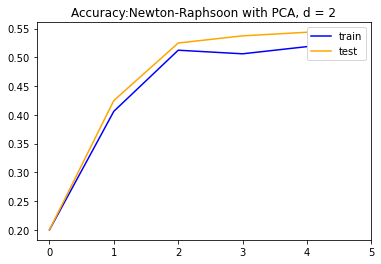

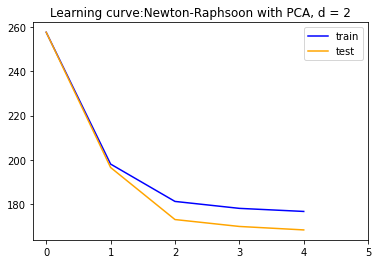

TYPE: Newton-Raphsoon with PCA, d = 2
Training accuracy    : 0.51875
Test accuracy        : 0.54375
(784, 160)


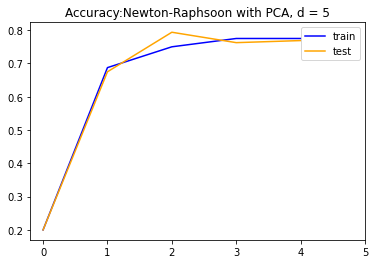

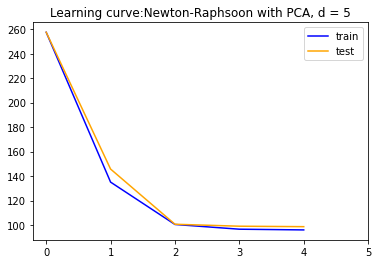

TYPE: Newton-Raphsoon with PCA, d = 5
Training accuracy    : 0.775
Test accuracy        : 0.76875
(784, 160)


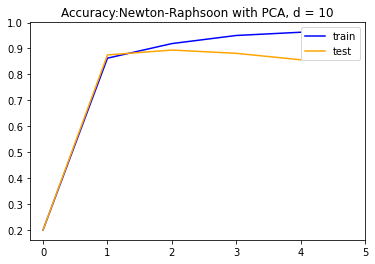

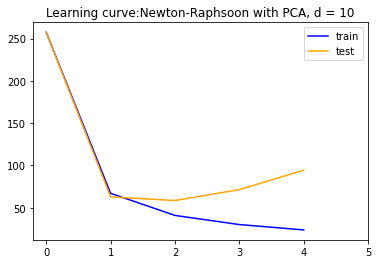

TYPE: Newton-Raphsoon with PCA, d = 10
Training accuracy    : 0.9625
Test accuracy        : 0.85625


In [21]:
# Newton with PCA
d = 2
ev = get_eigvec(Phi,d)
Phi_ = PCA_transformation(Phi,ev,d)
vali_Phi_ = PCA_transformation(vali_Phi,ev,d)
train_err_list, test_err_list, train_acc_list, test_acc_list = logistic_regression_PCA(Phi_,vali_Phi_,0,0,5,d)
graph2(5,train_acc_list,test_acc_list,train_err_list,test_err_list, "Newton-Raphsoon with PCA, d = 2")
d = 5
ev = get_eigvec(Phi,d)
Phi_ = PCA_transformation(Phi,ev,d)
vali_Phi_ = PCA_transformation(vali_Phi,ev,d)
train_err_list, test_err_list, train_acc_list, test_acc_list = logistic_regression_PCA(Phi_,vali_Phi_,0,0,5,d)
graph2(5,train_acc_list,test_acc_list,train_err_list,test_err_list, "Newton-Raphsoon with PCA, d = 5")
d = 10
ev = get_eigvec(Phi,d)
Phi_ = PCA_transformation(Phi,ev,d)
vali_Phi_ = PCA_transformation(vali_Phi,ev,d)
train_err_list, test_err_list, train_acc_list, test_acc_list = logistic_regression_PCA(Phi_,vali_Phi_,0,0,5,d)
graph2(5,train_acc_list,test_acc_list,train_err_list,test_err_list, "Newton-Raphsoon with PCA, d = 10")

(784, 160)


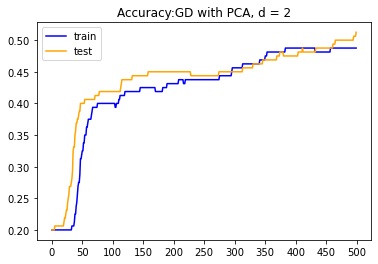

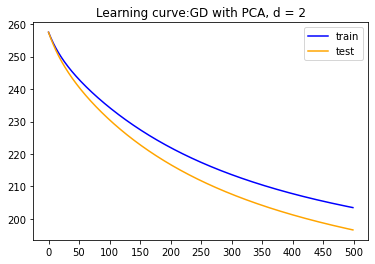

TYPE: GD with PCA, d = 2
Training accuracy    : 0.4875
Test accuracy        : 0.5125
(784, 160)


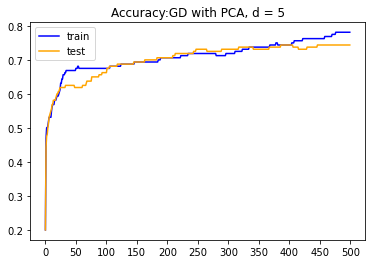

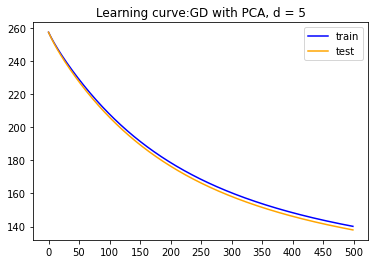

TYPE: GD with PCA, d = 5
Training accuracy    : 0.78125
Test accuracy        : 0.74375
(784, 160)


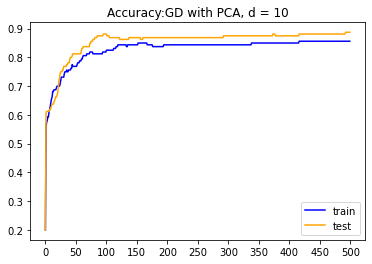

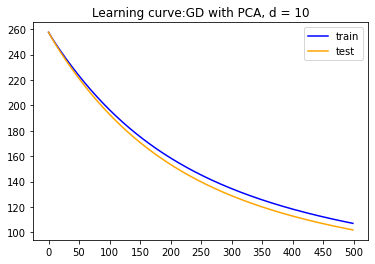

TYPE: GD with PCA, d = 10
Training accuracy    : 0.85625
Test accuracy        : 0.8875


In [22]:
# GD with PCA
iter_num = 500
mode = 1
a = 0.001
d = 2
ev = get_eigvec(Phi,d)
Phi_ = PCA_transformation(Phi,ev,d)
vali_Phi_ = PCA_transformation(vali_Phi,ev,d)
train_err_list, test_err_list, train_acc_list, test_acc_list = logistic_regression_PCA(Phi_,vali_Phi_,mode,a,iter_num,d)
graph2(iter_num,train_acc_list,test_acc_list,train_err_list,test_err_list, "GD with PCA, d = 2")
d = 5
ev = get_eigvec(Phi,d)
Phi_ = PCA_transformation(Phi,ev,d)
vali_Phi_ = PCA_transformation(vali_Phi,ev,d)
train_err_list, test_err_list, train_acc_list, test_acc_list = logistic_regression_PCA(Phi_,vali_Phi_,mode,a,iter_num,d)
graph2(iter_num,train_acc_list,test_acc_list,train_err_list,test_err_list, "GD with PCA, d = 5")
d = 10
ev = get_eigvec(Phi,d)
Phi_ = PCA_transformation(Phi,ev,d)
vali_Phi_ = PCA_transformation(vali_Phi,ev,d)
train_err_list, test_err_list, train_acc_list, test_acc_list = logistic_regression_PCA(Phi_,vali_Phi_,mode,a,iter_num,d)
graph2(iter_num,train_acc_list,test_acc_list,train_err_list,test_err_list, "GD with PCA, d = 10")

(784, 160)


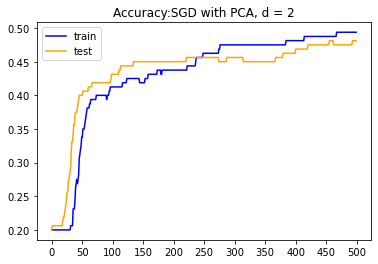

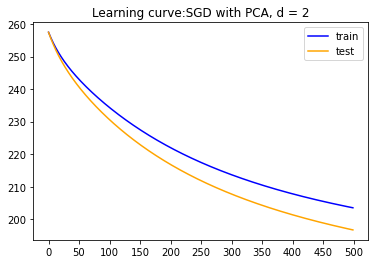

TYPE: SGD with PCA, d = 2
Training accuracy    : 0.49375
Test accuracy        : 0.48125
(784, 160)


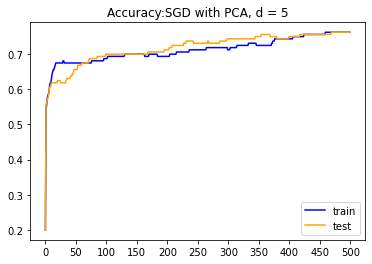

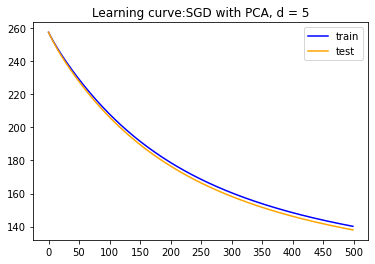

TYPE: SGD with PCA, d = 5
Training accuracy    : 0.7625
Test accuracy        : 0.7625
(784, 160)


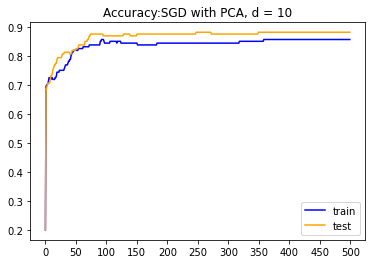

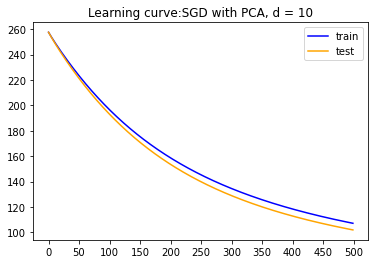

TYPE: SGD with PCA, d = 10
Training accuracy    : 0.85625
Test accuracy        : 0.88125


In [23]:
# SGD with PCA
iter_num = 500
mode = 2
a = 0.001
d = 2
ev = get_eigvec(Phi,d)
Phi_ = PCA_transformation(Phi,ev,d)
vali_Phi_ = PCA_transformation(vali_Phi,ev,d)
train_err_list, test_err_list, train_acc_list, test_acc_list = logistic_regression_PCA(Phi_,vali_Phi_,mode,a,iter_num,d)
graph2(iter_num,train_acc_list,test_acc_list,train_err_list,test_err_list, "SGD with PCA, d = 2")
d = 5
ev = get_eigvec(Phi,d)
Phi_ = PCA_transformation(Phi,ev,d)
vali_Phi_ = PCA_transformation(vali_Phi,ev,d)
train_err_list, test_err_list, train_acc_list, test_acc_list = logistic_regression_PCA(Phi_,vali_Phi_,mode,a,iter_num,d)
graph2(iter_num,train_acc_list,test_acc_list,train_err_list,test_err_list, "SGD with PCA, d = 5")
d = 10
ev = get_eigvec(Phi,d)
Phi_ = PCA_transformation(Phi,ev,d)
vali_Phi_ = PCA_transformation(vali_Phi,ev,d)
train_err_list, test_err_list, train_acc_list, test_acc_list = logistic_regression_PCA(Phi_,vali_Phi_,mode,a,iter_num,d)
graph2(iter_num,train_acc_list,test_acc_list,train_err_list,test_err_list, "SGD with PCA, d = 10")

(784, 160)


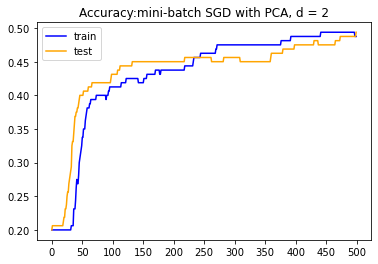

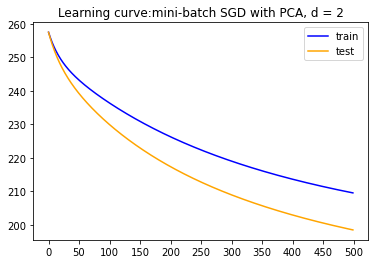

TYPE: mini-batch SGD with PCA, d = 2
Training accuracy    : 0.4875
Test accuracy        : 0.49375
(784, 160)


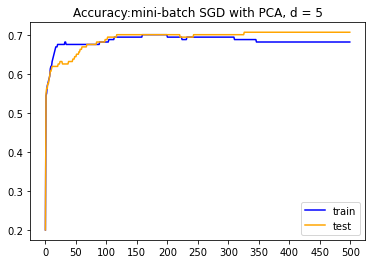

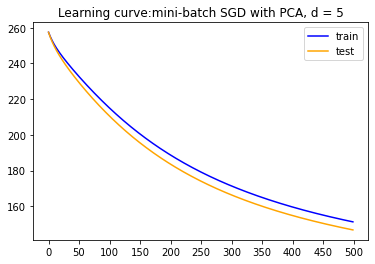

TYPE: mini-batch SGD with PCA, d = 5
Training accuracy    : 0.68125
Test accuracy        : 0.70625
(784, 160)


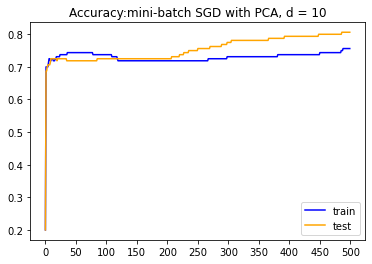

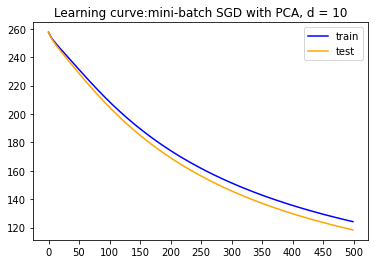

TYPE: mini-batch SGD with PCA, d = 10
Training accuracy    : 0.75625
Test accuracy        : 0.80625


In [24]:
# mini-batch SGD with PCA
iter_num = 500
mode = 3
a = 0.001
d = 2
ev = get_eigvec(Phi,d)
Phi_ = PCA_transformation(Phi,ev,d)
vali_Phi_ = PCA_transformation(vali_Phi,ev,d)
train_err_list, test_err_list, train_acc_list, test_acc_list = logistic_regression_PCA(Phi_,vali_Phi_,mode,a,iter_num,d)
graph2(iter_num,train_acc_list,test_acc_list,train_err_list,test_err_list, "mini-batch SGD with PCA, d = 2")
d = 5
ev = get_eigvec(Phi,d)
Phi_ = PCA_transformation(Phi,ev,d)
vali_Phi_ = PCA_transformation(vali_Phi,ev,d)
train_err_list, test_err_list, train_acc_list, test_acc_list = logistic_regression_PCA(Phi_,vali_Phi_,mode,a,iter_num,d)
graph2(iter_num,train_acc_list,test_acc_list,train_err_list,test_err_list, "mini-batch SGD with PCA, d = 5")
d = 10
ev = get_eigvec(Phi,d)
Phi_ = PCA_transformation(Phi,ev,d)
vali_Phi_ = PCA_transformation(vali_Phi,ev,d)
train_err_list, test_err_list, train_acc_list, test_acc_list = logistic_regression_PCA(Phi_,vali_Phi_,mode,a,iter_num,d)
graph2(iter_num,train_acc_list,test_acc_list,train_err_list,test_err_list, "mini-batch SGD with PCA, d = 10")

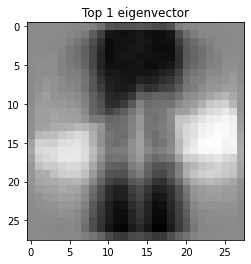

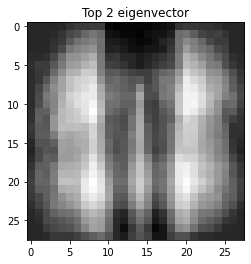

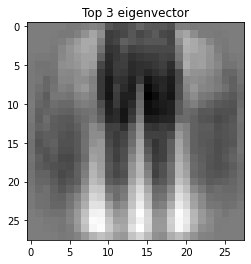

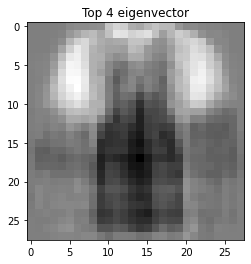

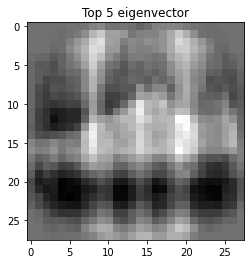

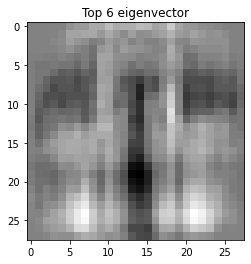

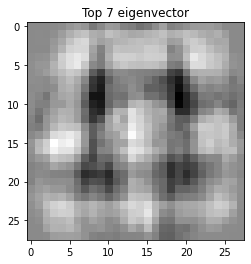

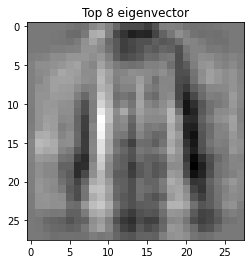

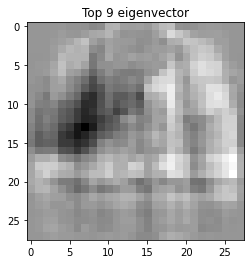

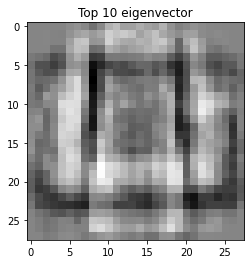

(784, 160)


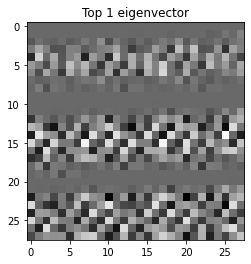

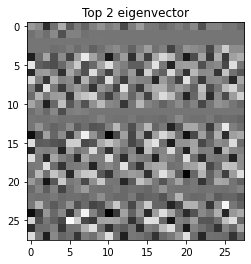

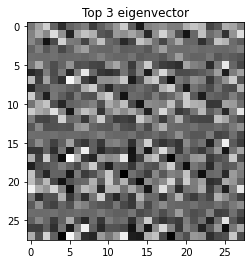

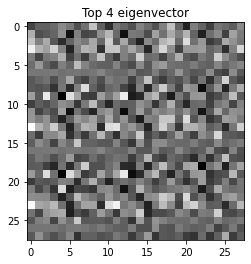

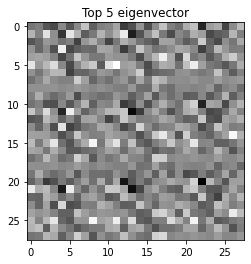

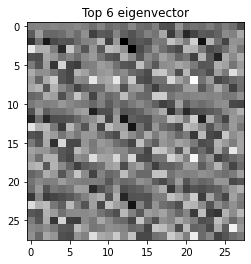

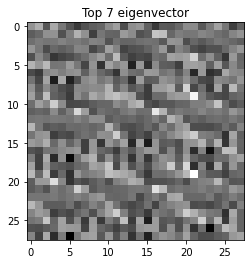

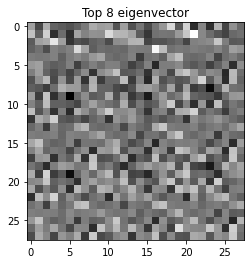

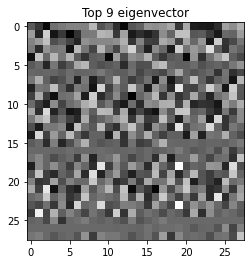

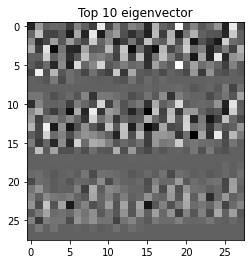

In [29]:
# 2-(b) plot top d eigenvector
# d = 2
# eig_vecs = get_top_d_eigvec(Phi,d)
# eig_vecs = eig_vecs.reshape(d,784)
# for i in range(d):
#     Min = np.min(eig_vecs[i])
#     Max = np.max(eig_vecs[i])
#     Range = Max-Min
#     for j in range(784):
#         eig_vecs[i][j] = ((eig_vecs[i][j] - Min) / Range) * 255
#         eig_vecs[i][j] = int(eig_vecs[i][j])
# for i in range(d):
#     img = eig_vecs[i].reshape((28,28))
#     plt.imshow(img, cmap = "gray") 
#     plt.title("Top 2 eigenvector")
#     plt.show()
# d = 5
# eig_vecs = get_top_d_eigvec(Phi,d)
# eig_vecs = eig_vecs.reshape(d,784)
# for i in range(d):
#     Min = np.min(eig_vecs[i])
#     Max = np.max(eig_vecs[i])
#     Range = Max-Min
#     for j in range(784):
#         eig_vecs[i][j] = ((eig_vecs[i][j] - Min) / Range) * 255
#         eig_vecs[i][j] = int(eig_vecs[i][j])
# for i in range(d):
#     img = eig_vecs[i].reshape((28,28))
#     plt.imshow(img, cmap = "gray") 
#     plt.title("Top 5 eigenvector")
#     plt.show()
d = 10
eig_vecs = get_top_d_eigvec(Phi,d)
eig_vecs = eig_vecs.reshape(d,784)
for i in range(d):
    Min = np.min(eig_vecs[i])
    Max = np.max(eig_vecs[i])
    Range = Max-Min
    for j in range(784):
        eig_vecs[i][j] = ((eig_vecs[i][j] - Min) / Range) * 255
        eig_vecs[i][j] = int(eig_vecs[i][j])
for i in range(d):
    img = eig_vecs[i].reshape((28,28))
    plt.imshow(img, cmap = "gray") 
    plt.title("Top "+str(i+1)+" eigenvector")
    plt.show()
d = 10
eig_vecs = get_eigvec(Phi,d)
eig_vecs = eig_vecs.reshape(d,784)
for i in range(d):
    Min = np.min(eig_vecs[i])
    Max = np.max(eig_vecs[i])
    Range = Max-Min
    for j in range(784):
        eig_vecs[i][j] = ((eig_vecs[i][j] - Min) / Range) * 255
        eig_vecs[i][j] = int(eig_vecs[i][j])
for i in range(d):
    img = eig_vecs[i].reshape((28,28))
    plt.imshow(img, cmap = "gray") 
    plt.title("Top "+str(i+1)+" eigenvector")
    plt.show()

In [26]:
# logistic_regression function with Newton
def get_w(Phi,iter_num,d):
    w = np.zeros((5,d))
    N = 160 # total test case number
    for i in range(iter_num):
        # Newton
        for j in range(5):
            for k in range(5):
                # calculate delta_E(w)
                delta_Ej = np.zeros(d)
                for n in range(N):
                    y = get_y(j,Phi[n],w)
                    t = T[n][j]
                    delta_Ej = delta_Ej + (y-t)*Phi[n]
                # calculate H
                H = np.zeros((d,d))
                for n in range(N):
                    y_k = get_y(k,Phi[n],w) #ynk
                    y_j = get_y(j,Phi[n],w) #ynj
                    if(k == j):
                        H += y_k*(1-y_j)*np.dot(Phi[n].T,Phi[n])
                H_inv = np.linalg.pinv(H)
                tmp = np.dot(delta_Ej,H_inv).reshape(d)
                w[j] = w[j] - tmp
    return w
def standardization(a):
    Max = np.max(a)
    Min = np.min(a)
    Range = Max-Min
    a_ = a - Min
    a_ = a_ / Range
    return a_

In [27]:
# 2-3(a)
d = 2
ev = get_eigvec(Phi,d)
Phi_ = PCA_transformation(Phi,ev,d)
one = np.ones(160)
Phi_ = Phi_.reshape(160,2)
Phi_ = np.insert(Phi_,0,one,axis=1)
Phi_ = Phi_.reshape((160,1,3))
w = get_w(Phi_,10,3)
# 2-3(b)
Phi_ = Phi_.reshape((160,3))
a = Phi_[:,1]
a_2 = a*a
b = Phi_[:,1]
b_2 = b*b
ab = a*b
a_2 = standardization(a_2)
b_2 = standardization(b_2)
ab = standardization(ab)
Phi_ = np.insert(Phi_,3,a_2,axis=1)
Phi_ = np.insert(Phi_,4,ab,axis=1)
Phi_ = np.insert(Phi_,5,b_2,axis=1)
Phi_ = Phi_.reshape((160,1,6))
w2 = get_w(Phi_,5,6)

(784, 160)


(784, 160)


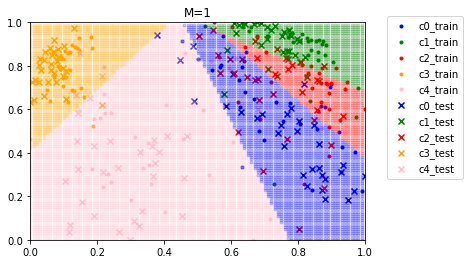

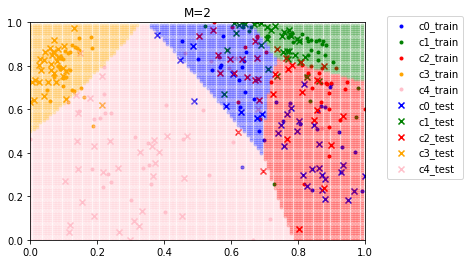

In [28]:
# 2-3
import sys
d = 2
ev = get_eigvec(Phi,d)
Phi_ = PCA_transformation(Phi,ev,d)
Phi_ = Phi_.reshape((160,2))
vali_Phi_ = PCA_transformation(vali_Phi,ev,d)
vali_Phi_ = vali_Phi_.reshape((160,2))
c0 = []
c1 = []
c2 = []
c3 = []
c4 = []
for i in range(160):
    if(T[i][0] == 1):
        c0.append(Phi_[i])  
    elif(T[i][1] == 1):
        c1.append(Phi_[i])
    elif(T[i][2] == 1):
        c2.append(Phi_[i])
    elif(T[i][3] == 1):
        c3.append(Phi_[i])
    elif(T[i][4] == 1):
        c4.append(Phi_[i])
c0 = np.array(c0)
c1 = np.array(c1)
c2 = np.array(c2)
c3 = np.array(c3)
c4 = np.array(c4)
plt.scatter(c0[:,0],c0[:,1],color='blue',marker='.',label='c0_train')
plt.scatter(c1[:,0],c1[:,1],color='green',marker='.',label='c1_train')
plt.scatter(c2[:,0],c2[:,1],color='red',marker='.',label='c2_train')
plt.scatter(c3[:,0],c3[:,1],color='orange',marker='.',label='c3_train')
plt.scatter(c4[:,0],c4[:,1],color='pink',marker='.',label='c4_train')
c0 = []
c1 = []
c2 = []
c3 = []
c4 = []
for i in range(160):
    if(T[i][0] == 1):
        c0.append(vali_Phi_[i])  
    elif(T[i][1] == 1):
        c1.append(vali_Phi_[i])
    elif(T[i][2] == 1):
        c2.append(vali_Phi_[i])
    elif(T[i][3] == 1):
        c3.append(vali_Phi_[i])
    elif(T[i][4] == 1):
        c4.append(vali_Phi_[i])
c0 = np.array(c0)
c1 = np.array(c1)
c2 = np.array(c2)
c3 = np.array(c3)
c4 = np.array(c4)
plt.scatter(c0[:,0],c0[:,1],color='blue',marker='x',label='c0_test')
plt.scatter(c1[:,0],c1[:,1],color='green',marker='x',label='c1_test')
plt.scatter(c2[:,0],c2[:,1],color='red',marker='x',label='c2_test')
plt.scatter(c3[:,0],c3[:,1],color='orange',marker='x',label='c3_test')
plt.scatter(c4[:,0],c4[:,1],color='pink',marker='x',label='c4_test')
# decision region
P = 100
for i in range(P):
    for j in range(P):
        vals = np.dot(w,[1,i/P,j/P])
        Max = -sys.maxsize
        idx = -1
        for k in range(5):
            if(vals[k] > Max):
                idx = k
                Max = vals[k]
        if(idx == 0):
            plt.plot(i/P,j/P,color='blue',marker='.',alpha=0.2)
        elif(idx == 1):
            plt.plot(i/P,j/P,color='green',marker='.',alpha=0.2)
        elif(idx == 2):
            plt.plot(i/P,j/P,color='red',marker='.',alpha=0.2)
        elif(idx == 3):
            plt.plot(i/P,j/P,color='orange',marker='.',alpha=0.2)
        elif(idx == 4):
            plt.plot(i/P,j/P,color='pink',marker='.',alpha=0.2)
#
plt.ylim(0,1.0)
plt.xlim(0,1.0)
plt.legend(bbox_to_anchor=(1.05, 1.05))
plt.title('M=1')
plt.show()
#
c0 = []
c1 = []
c2 = []
c3 = []
c4 = []
for i in range(160):
    if(T[i][0] == 1):
        c0.append(Phi_[i])  
    elif(T[i][1] == 1):
        c1.append(Phi_[i])
    elif(T[i][2] == 1):
        c2.append(Phi_[i])
    elif(T[i][3] == 1):
        c3.append(Phi_[i])
    elif(T[i][4] == 1):
        c4.append(Phi_[i])
c0 = np.array(c0)
c1 = np.array(c1)
c2 = np.array(c2)
c3 = np.array(c3)
c4 = np.array(c4)
plt.scatter(c0[:,0],c0[:,1],color='blue',marker='.',label='c0_train')
plt.scatter(c1[:,0],c1[:,1],color='green',marker='.',label='c1_train')
plt.scatter(c2[:,0],c2[:,1],color='red',marker='.',label='c2_train')
plt.scatter(c3[:,0],c3[:,1],color='orange',marker='.',label='c3_train')
plt.scatter(c4[:,0],c4[:,1],color='pink',marker='.',label='c4_train')
c0 = []
c1 = []
c2 = []
c3 = []
c4 = []
for i in range(160):
    if(T[i][0] == 1):
        c0.append(vali_Phi_[i])  
    elif(T[i][1] == 1):
        c1.append(vali_Phi_[i])
    elif(T[i][2] == 1):
        c2.append(vali_Phi_[i])
    elif(T[i][3] == 1):
        c3.append(vali_Phi_[i])
    elif(T[i][4] == 1):
        c4.append(vali_Phi_[i])
c0 = np.array(c0)
c1 = np.array(c1)
c2 = np.array(c2)
c3 = np.array(c3)
c4 = np.array(c4)
plt.scatter(c0[:,0],c0[:,1],color='blue',marker='x',label='c0_test')
plt.scatter(c1[:,0],c1[:,1],color='green',marker='x',label='c1_test')
plt.scatter(c2[:,0],c2[:,1],color='red',marker='x',label='c2_test')
plt.scatter(c3[:,0],c3[:,1],color='orange',marker='x',label='c3_test')
plt.scatter(c4[:,0],c4[:,1],color='pink',marker='x',label='c4_test')
# decision region
P = 100
for i in range(P):
    for j in range(P):
        vals = np.dot(w2,[1,i/P,j/P,i*i/P/P,i*j/P/P,j*j/P/P])
        Max = -sys.maxsize
        idx = -1
        for k in range(5):
            if(vals[k] > Max):
                idx = k
                Max = vals[k]
        if(idx == 0):
            plt.plot(i/P,j/P,color='blue',marker='.',alpha=0.2)
        elif(idx == 1):
            plt.plot(i/P,j/P,color='green',marker='.',alpha=0.2)
        elif(idx == 2):
            plt.plot(i/P,j/P,color='red',marker='.',alpha=0.2)
        elif(idx == 3):
            plt.plot(i/P,j/P,color='orange',marker='.',alpha=0.2)
        elif(idx == 4):
            plt.plot(i/P,j/P,color='pink',marker='.',alpha=0.2)
#
plt.ylim(0,1.0)
plt.xlim(0,1.0)
plt.legend(bbox_to_anchor=(1.05, 1.05))
plt.title('M=2')
plt.show()

# 2-4 Discussion
- In 2-1, we get a steep and sharp learning curve from Newton-Raphson compared to other gradiant descent methods. The reason is the nature of Newton method which means its root-finding process tends to converge faster than gradiant descent methods. With my experiment results, it's clearly to see that Newton method only needs one iteration to find the best weight while gradiant descent methods need at least 20 iterations to get decent results. On the other hand, Newton method has the highest training and test accuracy among these methods. However, the only drawback of Newton method is the time. It takes much more time to finish one iteration than those gradiant descent methods.
- I also want to metion the differences between different gradiant descent methods. First, Normal gradiant descent method needs the less iterations to get 95% accuracy in test data. Second, the graph of SGD method and mini-batch SGD method both oscillate during the learning process, which shows SGD-family's root finding process is not as direct as normal GD method.

- In 2-2(a), as the dimension of images increases, the training accuracy is getting higher while the test accuracy is getting lower. At the end of the day, though we want higher training accuracy, it is still not good to see such overfitting problem. The results probably means that the top 2 eigenvector can nicely represent the original 28*28 gray graph. With more eigenvectors invovled, it will not help to do a better decision in classification. 

- In 2-2(b), let's call the covariance matrix of original 784 features as $C$. The weirdest part is if I use eigenvectors of $C$ to draw graph, the graph will be a disorganized one. However, if I used the eigenvector of $C^TC$ to draw the graphs, they starts to show the contour of pants and clothes. I am not sure about which results are the desired one.

- Last but not least, In 2-3, it is cool to know that we can use a lot of points to draw the decision regions. As the result shown above, we can easily distinguish class 1, class 3 and class 4 with only two features and one constant. Nonetheless, we have a bad result on distiguishing between class 0 and class 2. I think the reason is that class 0 consists a lot of shirts and class 2 consists a lot of short-sleeved dresses. Since shirt and short-sleeved dress have pretty similar on the top, it results we cannot make a good decision boundary between these two classes. This problem cannot be solved even in model M = 2, so I think we should take more features into consideration to do a better classification
